## 定义正则表达式

In [11]:
metrics_json = {}
for each_class in class_list: # 遍历每个类别
    re_pattern = r'\s+{}.*?\|(.*)?\|'.format(each_class) # 定义该类别的正则表达式
    metrics_json[each_class] = {}
    metrics_json[each_class]['re_pattern'] = re.compile(re_pattern)

In [12]:
# 匹配
for each_class in class_list: # 遍历每个类别
    find_string = re.findall(metrics_json[each_class]['re_pattern'], logs) # 粗匹配
    find_string = transform_table_line(find_string) # 精匹配
    metrics_json[each_class]['metrics'] = find_string

In [13]:
metrics_json.keys()

dict_keys(['building', 'cultivated_land', 'forest', 'water_body', 'road', 'grassland', 'other'])

## 查看某一类别的评估指标 IoU Acc Dice Fscore Precision Recall

In [14]:
each_class = 'forest'
each_class_metrics = np.array(metrics_json[each_class]['metrics'])

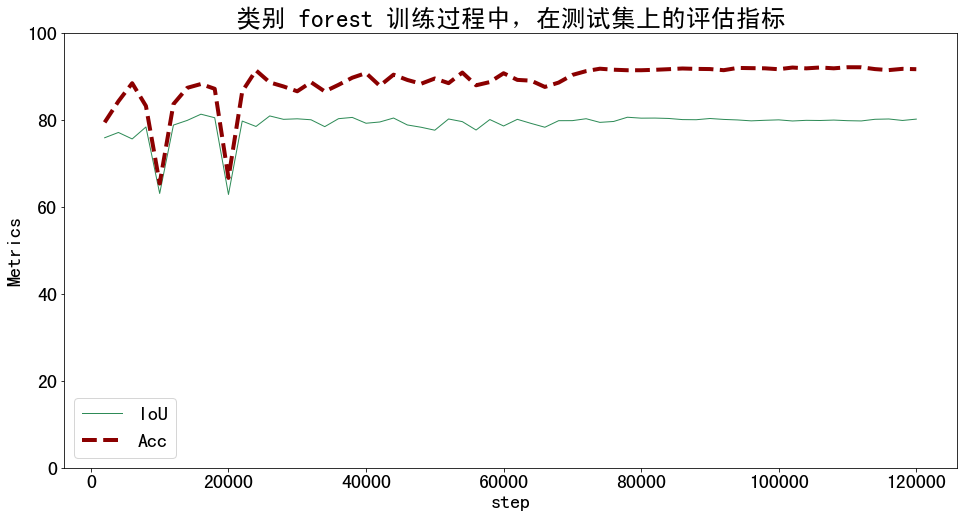

In [15]:
plt.figure(figsize=(16, 8))

for idx, each_metric in enumerate(['IoU', 'Acc', 'Dice', 'Fscore', 'Precision', 'Recall']):

    try:
        plt.plot(x, each_class_metrics[:,idx], label=each_metric, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('类别 {} 训练过程中，在测试集上的评估指标'.format(each_class), fontsize=25)

plt.legend(fontsize=20)

plt.savefig('图表/类别 {} 训练过程评估指标.pdf'.format(each_class), dpi=120, bbox_inches='tight')

plt.show()

## 查看每个类别的评估指标 IoU Acc Dice Fscore Precision Recall

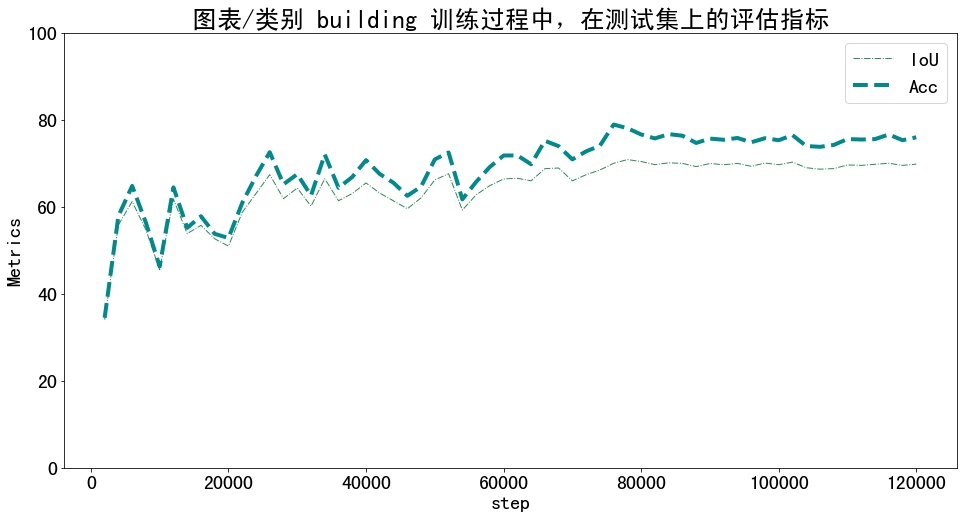

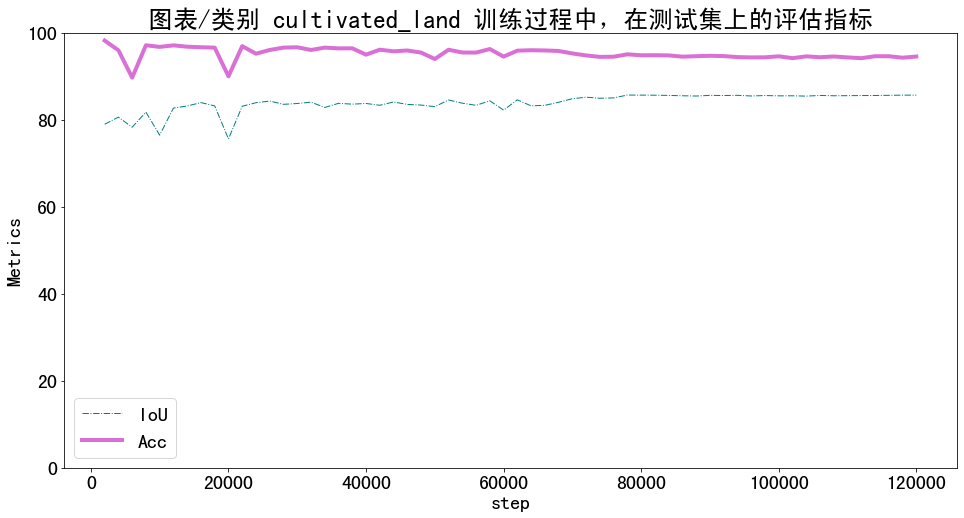

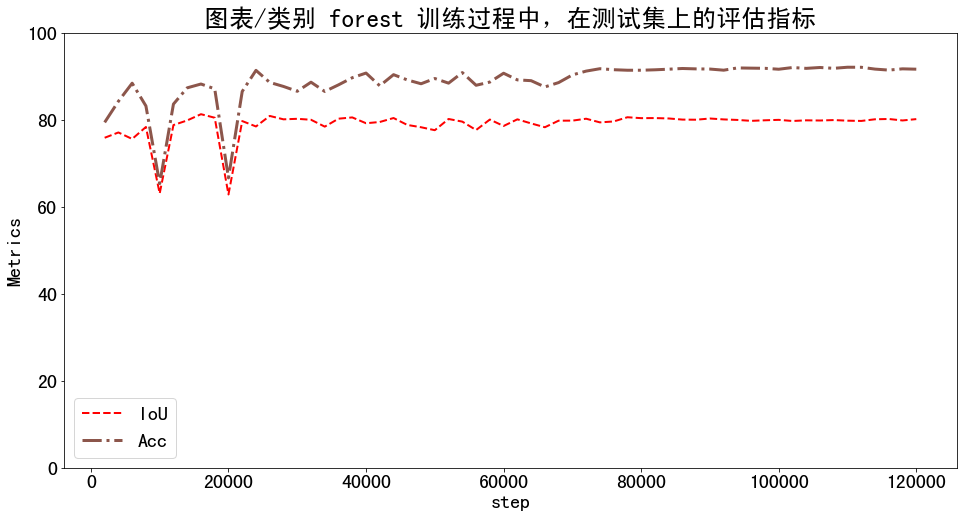

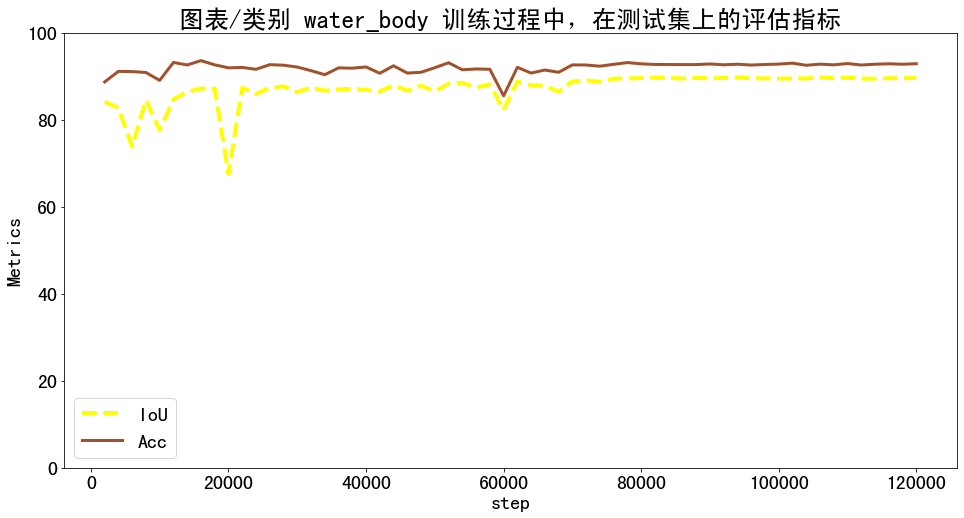

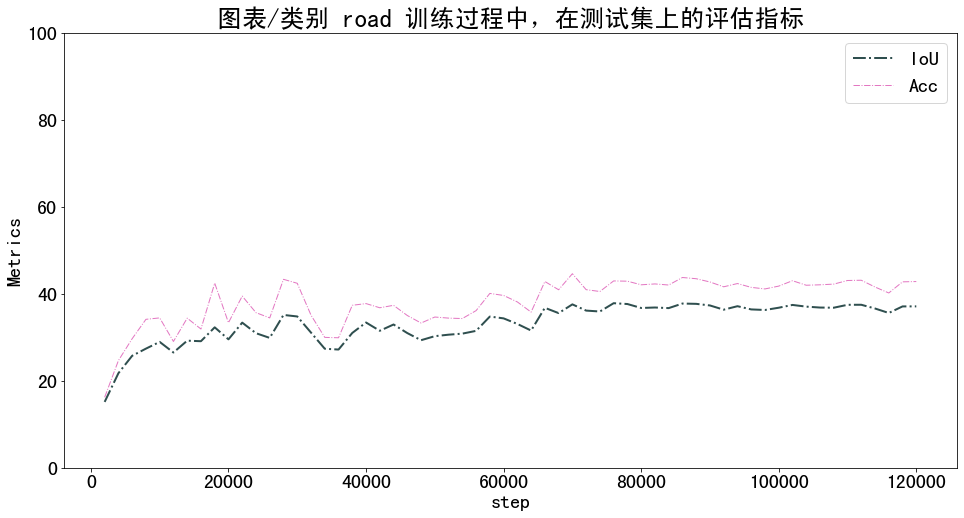

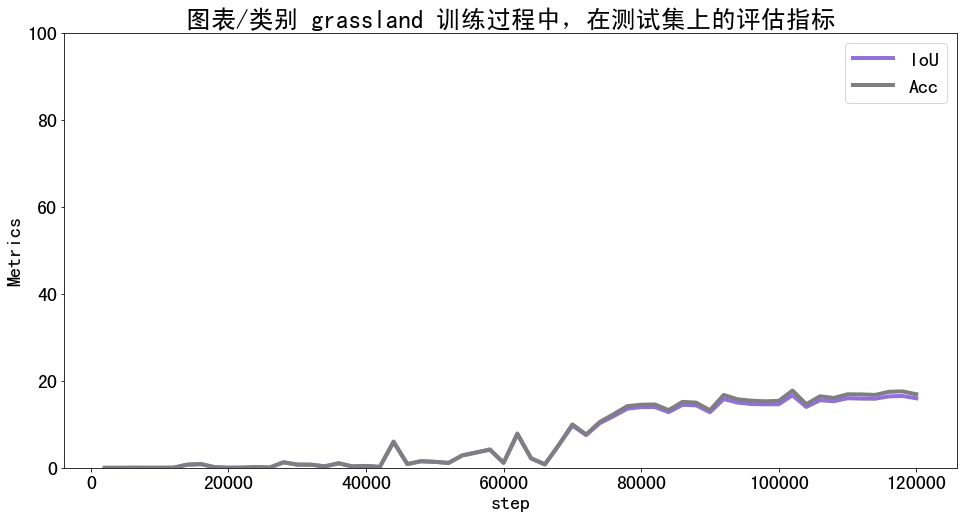

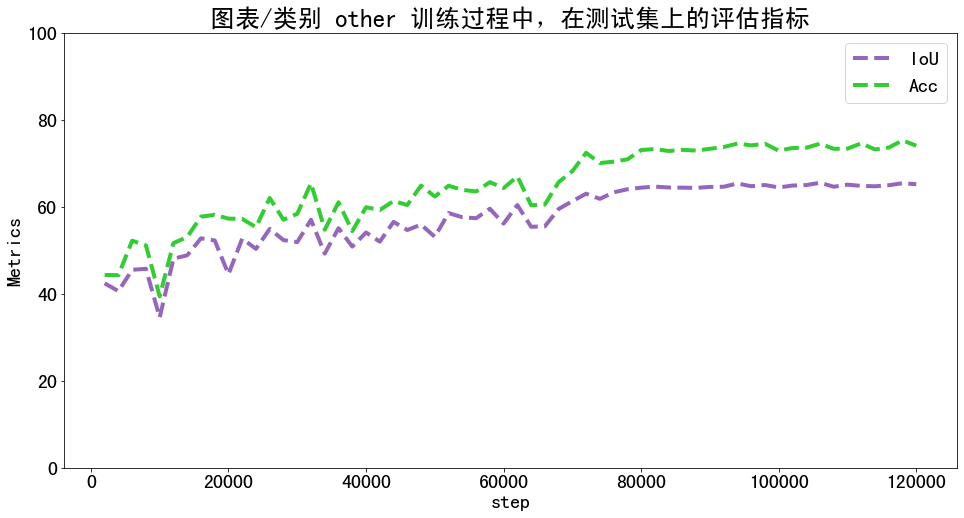

In [16]:
for each_class in class_list: # 遍历每个类别
    each_class_metrics = np.array(metrics_json[each_class]['metrics'])
    
    plt.figure(figsize=(16, 8))

    for idx, each_metric in enumerate(['IoU', 'Acc', 'Dice', 'Fscore', 'Precision', 'Recall']):

        try:
            plt.plot(x, each_class_metrics[:,idx], label=each_metric, **get_line_arg())
        except:
            pass

    plt.tick_params(labelsize=20)
    plt.ylim([0, 100])
    plt.xlabel('step', fontsize=20)
    plt.ylabel('Metrics', fontsize=20)
    plt.title('图表/类别 {} 训练过程中，在测试集上的评估指标'.format(each_class), fontsize=25)

    plt.legend(fontsize=20)

    # plt.savefig('类别 {} 训练过程评估指标.pdf'.format(each_class), dpi=120, bbox_inches='tight')

    plt.show()